<h1>An Image Colourization Demonstration Script (Using False Colour)</h1>
<p><b>George J. Bendo</b><br/>
<b>02 January 2022</b></p>

<p>This script converts a FITS image into greyscale and false colour png images.  It is intended to be a demonstration of how professional astronomy images in general can be colourized.</p>

<p>The example used below is based on the mid-infrared (24 micron) image of M81 from <a href="http://ned.ipac.caltech.edu/uri/NED::Image/fits/2012MNRAS.423..197B/NGC_3031:I:MIPS24:bgm2012">http://ned.ipac.caltech.edu/uri/NED::Image/fits/2012MNRAS.423..197B/NGC_3031:I:MIPS24:bgm2012</a>.  This file should be downloaded to the same directory as the Jupyter Notebook before running the script.</p>
    
<p>The script will also work with other FITS files, although some of the lines would need to be modified.  The locations of these lines are indicated in the comments within the code below using the words <i>MODIFICATION OPTION</i>.</p>

<p>The following packages need to be installed to use this script: astropy, matplotlib, numpy, and PIL.  The matplotlib and numpy packages are standard python utilities.  The astropy package contains the tools needed to import FITS files.  PIL is used to export images as png files.</p>

Perform a series of prepratory steps first.

In [1]:
# Import packages.
import numpy
import matplotlib.pyplot as pp
from astropy.io import fits
from PIL import Image

In [2]:
# Set functions that describe the colours (r, g, and b).  The input image will
# be rescaled to values between 0 and 1000 before these conversions are applied.
# These functions will then scale those pixel values into rgb colours that
# range from 0 to 255.  These conversion will produce a colours that change
# from black through red and yellow to white, producing something like a "heat"
# colour scale.
#
# [MODIFICATION OPTION: Change these lines to change the colours.  This can be
# quite complicated, but the plots in the next step can be used check how the
# science valeus are mapped into red, green, and blue pixel values.  Keep in
# mind how these three colours combine to produce other colours.]
x=numpy.asarray(range(1001))
r=x*0.6
g=(x-350)*0.52
b=(x-650)*(255./350)

# Perform some additional steps to adjust the ranges of the r, g, and b arrays
# so that they stay between 0 and 255.
r[r>255]=255
g[g<0]=0
g[g>255]=255
b[b<0]=0
b[b>255]=255

Text(0, 0.5, 'Output PNG Pixel Value')

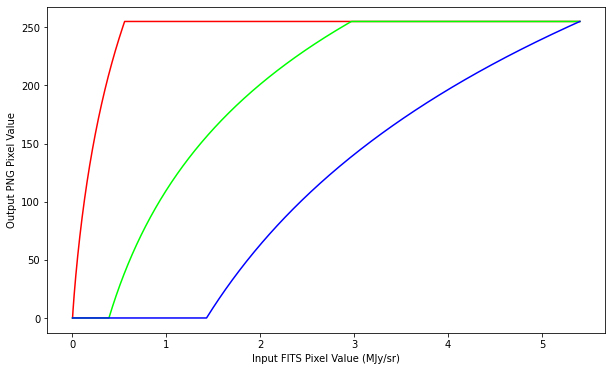

In [3]:
# For display purposes, convert from x to the scientific units of the specific
# input image used in this demo.  This includes accounting for adjustable
# parameter values.  
#
# [WARNING: This will not produce accurate results if the parameters for 
# converting between the scientific values and rgb values (imgoffset, levelmin,
# levelmax, and levelpower) are not updated to match the values used below.
# in the script below.]
imgoffset=0.22
levelmin=-0.65
levelmax=0.75
levelpower=0.9
scival=10**((levelmax-levelmin)*(x/1000)**(1/levelpower)+levelmin)-imgoffset

# Plot the conversion curves.
pp.figure(figsize=[10,6])
pp.plot(scival,r,color='#FF0000')
pp.plot(scival,g,color='#00FF00')
pp.plot(scival,b,color='#0000FF')
pp.xlabel('Input FITS Pixel Value (MJy/sr)')
pp.ylabel('Output PNG Pixel Value')

Read in and prepare the image.

In [4]:
# Read the data.  Since this is a simple colourization exercise, the header is 
# not read into the python environment.  
#
# [MODIFICATION OPTION: Use a different FITS file as the input in the first line 
# below.]
file=fits.open('NGC_3031_I_MIPS24_bgm2012.fits')
img=file[0].data
file.close()

In [5]:
# Crop the image.
imgcrop=img[480:1600,180:900]

Create and export a greyscale version of the image.

In [6]:
# Convert the image to log values, which will reveal more detail when the image 
# is converted to png.  
#
# This specific image is background-subtracted, which means that, in areas that 
# do not cover the galaxy, the mean pixel value is 0.  Consequently, many of 
# the pixels are less than 0.  To make the colour scaling look more natural, 
# it is appropriate to add an offset to the data.  In this case, the offset is 
# 5 times the noise levels (or, in statistical terms, 5 times the standard
# deviation in the background).  
#
# [MODIFICATION OPTION: Change the value of imgoffset to adjust the initial 
# background offset applied to the data.  For images that are not background-
# subtracted, it would be appropriate to place this close to the mean 
# background level.  Otherwise, it may be appropriate to apply an offset
# equal to 3-5 times the noise levels or to set it to 0.]
imgoffset=0.22
imglog=numpy.log10(imgcrop+imgoffset)

In [7]:
# Print the range of values in imglog, which is useful to know
# before rescaling the image.
print('Range of imglog values: ',numpy.min(imglog),' to ',numpy.max(imglog))

Range of imglog values:  -2.4564111  to  2.389815


In [8]:
# Rescale imglog so that the pixel values run from 0 to 256 between
# minumum (levelmin) and maximum (levelmax) values.  The levelpower
# value changes the exponent in the function describing this conversion.
#
# [MODIFICATION OPTION: Change the levelmin, levelmax, and levelpower
# parameters to adjust the colour levels.  Usually, levelpower=1 works
# for most images.  The levelmin and levelmax values should be set to
# include at least part of the range of values in imglog given by the
# step above.]
#
# [NOTE: Ignore the RuntimeWarning.]
levelmax=0.75
levelmin=-0.65
levelpower=0.9
imglog=((imglog-levelmin)/(levelmax-levelmin))**levelpower*255.
imglog[numpy.isnan(imglog)]=0
imglog[numpy.where(imglog<0)]=0
imglog[numpy.where(imglog>255)]=255

C:\Users\georg\AppData\Local\Temp/ipykernel_14140/2561334731.py:15: RuntimeWarning: invalid value encountered in power
  imglog=((imglog-levelmin)/(levelmax-levelmin))**levelpower*255.


In [9]:
# Write a greyscale version of the image to disk.
#
# [MODIFICATION OPTION: Use a different filename if desired.]
imgsav=Image.fromarray(numpy.flip(imglog.astype('uint8'),0),mode='L')
imgsav.save('ngc3031_spitzer24micron_bw.png','PNG')

Create and export a false colour version of the image.

In [10]:
#Convert the image to log values (again).
#
# [MODIFICATION OPTION: Change the value of imgoffset to adjust the initial 
# background offset applied to the data.]
imgoffset=0.22
imglog=numpy.log10(imgcrop+imgoffset)

In [11]:
# Print the range of values in imglog.
print('Range of imglog values: ',numpy.min(imglog),' to ',numpy.max(imglog))

Range of imglog values:  -2.4564111  to  2.389815


In [12]:
# Rescale imglog so that the pixel values run from 0 to 1000 between
# minumum (levelmin) and maximum (levelmax) values.
#
# [MODIFICATION OPTION: Change the levelmin, levelmax, and levelpower
# parameters to adjust the colour levels.]
#
# [NOTE: Ignore the RuntimeWarning.]
levelmax=0.75
levelmin=-0.65
levelpower=0.9
imglog=((imglog-levelmin)/(levelmax-levelmin))**levelpower*1000.
imglog[numpy.isnan(imglog)]=0
imglog[numpy.where(imglog<0)]=0
imglog[numpy.where(imglog>1000)]=1000

C:\Users\georg\AppData\Local\Temp/ipykernel_14140/2964144245.py:11: RuntimeWarning: invalid value encountered in power
  imglog=((imglog-levelmin)/(levelmax-levelmin))**levelpower*1000.


In [13]:
# Create r, g, and b version of the image.
imgr=r[imglog.astype(int)]
imgg=g[imglog.astype(int)]
imgb=b[imglog.astype(int)]

In [14]:
# Insert the imgr, imgg, and imgb arrays into an image cube named imgrgb.
imgrgb=numpy.zeros((1120,720,3))
imgrgb[:,:,0]=numpy.flip(imgr,0)
imgrgb[:,:,1]=numpy.flip(imgg,0)
imgrgb[:,:,2]=numpy.flip(imgb,0)

In [15]:
# Write the rgb image to disk.
#
# [MODIFICATION OPTION: Use a different filename if desired.]
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_spitzer24micron_falsecolour.png','PNG')

In [16]:
# Write the separate colour frames to disk.  This is primarily
# for demonstration purposes and can be skipped.
#
# [MODIFICATION OPTION: Use different filenames if desired.]
imgrgb=numpy.zeros((1120,720,3))
imgrgb[:,:,0]=numpy.flip(imgr,0)
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_spitzer24micron_r.png','PNG')

imgrgb=numpy.zeros((1120,720,3))
imgrgb[:,:,1]=numpy.flip(imgg,0)
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_spitzer24micron_g.png','PNG')

imgrgb=numpy.zeros((1120,720,3))
imgrgb[:,:,2]=numpy.flip(imgb,0)
imgsav=Image.fromarray(imgrgb.astype('uint8'),mode='RGB')
imgsav.save('ngc3031_spitzer24micron_b.png','PNG')